<a href="https://colab.research.google.com/github/Jav-DL/fastai-v3/blob/master/Lesson_2_linear_regression_problem_multi_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
#for static picture
%matplotlib inline 
#used for dynamic graphs (allows rotation)
# %matplotlib notebook 
# %matplotlib notebook  
import matplotlib.pyplot as plt #it shall be imported afterwards otherwise it won't work the interative plots

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
from mpl_toolkits import mplot3d

In [145]:
n = 100

A = torch.ones(n,3) #it contains all coefficients: Ax=y
A[:,0].uniform_(-1.,1) #replaces  all the first column values with a value between 1 and -1
A[:,1].uniform_(-4.,1) #replaces  all the first column values with a value between 1 and -1
A[:5]

tensor([[ 0.0747, -2.1450,  1.0000],
        [ 0.7745, -2.3221,  1.0000],
        [ 0.3974, -3.5640,  1.0000],
        [ 0.1532,  0.9801,  1.0000],
        [-0.4299, -3.8086,  1.0000]])

In [146]:
#Vector x: it contains x1, x2, x3
x = tensor(3.,-2,-3); x


tensor([ 3., -2., -3.])

In [0]:
y = A@x + torch.rand(n) #x has dimension 3x1 and A dim nx3

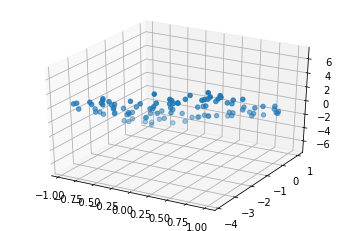

In [148]:
# Data for a three-dimensional line
#fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(A[:,0],A[:,1], y)


In [0]:
# This is a linear regression model. I need to find a line that minimises the error. We will pick up MSE (mean square error) as a loss function.
def mse(y_hat, y) : 
    return ((y_hat-y)**2).mean()
  

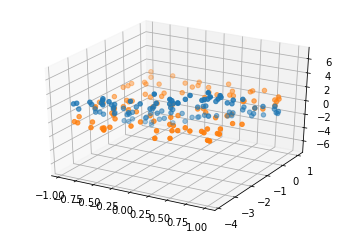

In [150]:
x_hat = tensor(torch.rand(1),torch.rand(1),torch.rand(1)); a #I initialise the y_hat coefficient randomly
x_hat = nn.Parameter(x_hat); a #the elements from "x_hat" are parameters

y_hat = A@x_hat

ax = plt.axes(projection='3d')
ax.scatter3D(A[:,0],A[:,1], y)
ax.scatter3D(A[:,0],A[:,1], y_hat)


In [151]:
# Error / loss function:
mse(y_hat, y)

tensor(12.1141, grad_fn=<MeanBackward0>)

In [0]:
# To compute the best line, we would like to minimise the loss functions (MSE). A derivate of that function closer to zero it means we are closer to a max/min.
#Note: in this case, the function doesn't have a max only a min because we have taken the square
%matplotlib inline 
# def update():
#   y_hat = A@x_hat
#   loss = mse(y,y_hat)
#   if t % 10 == 0: print (loss) #we print it from time to time
#   loss.backward() #we take the derivative
#   with torch.no_grad():
#     x_hat.sub_(lr*x_hat.grad) #the derivate gets saved in an attribute ".grad". So we take the coefficient from a and substract by the gradient*learning rate

def update():
    y_hat = A@x_hat
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        x_hat.sub_(lr * x_hat.grad)
        x_hat.grad.zero_() #we set the gradients to zero
        ax = plt.axes(projection='3d')
        ax.scatter3D(A[:,0],A[:,1], y)
        ax.scatter3D(A[:,0],A[:,1], y_hat)

tensor(12.1141, grad_fn=<MeanBackward0>)
tensor(1.9306, grad_fn=<MeanBackward0>)
tensor(0.4767, grad_fn=<MeanBackward0>)
tensor(0.1676, grad_fn=<MeanBackward0>)
tensor(0.0996, grad_fn=<MeanBackward0>)
tensor(0.0843, grad_fn=<MeanBackward0>)
tensor(0.0807, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)
tensor(0.0797, grad_fn=<MeanBackward0>)
tensor(0.0797, grad_fn=<MeanBackward0>)


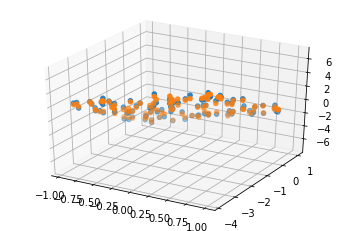

In [153]:
lr = .1; 
for t in range(100): update()